In [18]:
import geopandas as gpd
import pandas as pd
import folium
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline
import pickle
from streamlit_folium import folium_static

A _polygon_ is a GIS object  that consists of a series of x and y coordinate pairs that enclose an area.

The polygon data consist of the 4-digit postal code zones of two provinces in the Netherlands: Utrecht, and Noord-Holland. This vector data is in the format of '.SHP' and contains 65 polygons. 

In [19]:
data = gpd.read_file('polygon/Utrecht_NoordHolland.SHP', geometry='geometry')
data.head(3)
len(data)

205

<AxesSubplot:>

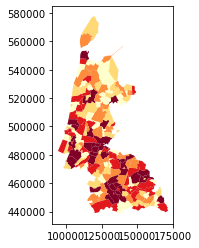

In [20]:
data.plot(column = 'inhabitant', scheme='quantiles', cmap='YlOrRd')

In [21]:
data.columns
data.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [22]:
# Use WGS 84 (epsg:4326) as the geographic coordinate system
data = data.to_crs(epsg=4326)
print(data.crs)
data.head(2)

epsg:4326


,mzr_id,mzr_name,wnp_id,wnp_name,gem_id,gem_name,prov_id,prov_name,inhabitant,address_co,NEAR_FID,NEAR_DIST,geometry
0,7142,Wieringerwaard e.o.,3187,Wieringerwaard,1911,Hollands Kroon,27,Noord-Holland,8020.0,3566.0,19990,4006.929967,"POLYGON ((4.87271 52.73158, 4.87312 52.73124, ..."
1,7108,Nibbixwoud e.o.,3153,Nibbixwoud,420,Medemblik,27,Noord-Holland,4865.0,2340.0,15468,147.141043,"POLYGON ((5.14446 52.69637, 5.12731 52.69167, ..."


In [23]:

import geopandas as gpd
import pandas as pd
import folium
import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
import pickle
from streamlit_folium import folium_static


data = gpd.read_file('polygon/Utrecht_NoordHolland.SHP', geometry='geometry')

basic_map = folium.Map(location=[52.08987363597544, 5.109621734475478], tiles='openstreetmap', zoom_start=13)
folium.GeoJson(data = data['geometry']).add_to(basic_map)
# MousePosition().add_to(basic_map)
folium_static(basic_map, width=500, height=300)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

# Analysis 
In a non-spatial setting, when all we need are summary statistics of the data, we aggregate our data using the `groupby()` function. But for spatial data, we sometimes also need to aggregate geometric features. In the geopandas library, we can aggregate geometric features using the `dissolve()` function.

<AxesSubplot:>

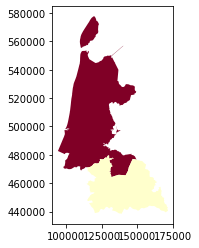

In [35]:
data.dissolve(by='prov_name', aggfunc='sum').plot(column = 'inhabitant', scheme='quantiles', cmap='YlOrRd')
# data.columns
# data.prov_name